In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
df1 = pd.read_csv('diabetes.csv')
df2 = pd.read_csv('doctors.csv', encoding = 'latin-1')

In [140]:
df1.head(3)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0


In [141]:
df2.head(3)

,PatientID,Physician
0,1000038,Jeanne Vestergaard
1,1000069,Sheldon Comeaux
2,1000118,Brain Dulaney


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
PatientID                 15000 non-null int64
Pregnancies               15000 non-null int64
PlasmaGlucose             15000 non-null int64
DiastolicBloodPressure    15000 non-null int64
TricepsThickness          15000 non-null int64
SerumInsulin              15000 non-null int64
BMI                       15000 non-null float64
DiabetesPedigree          15000 non-null float64
Age                       15000 non-null int64
Diabetic                  15000 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 2 columns):
PatientID    14895 non-null int64
Physician    14895 non-null object
dtypes: int64(1), object(1)
memory usage: 232.8+ KB


In [115]:
#df.column_name = df.column_name.astype(np.int64)

df1['PatientID'] = df1['PatientID'].astype(str)
df2['PatientID'] = df2['PatientID'].astype(str)

In [152]:
#df = pd.concat([df1, df2], axis = 1, join_axes = ['PatientID', 'PatientID'])
df = pd.merge(df1,df2, how = 'outer', indicator = True, on = 'PatientID')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 12 columns):
PatientID                 15000 non-null int64
Pregnancies               15000 non-null int64
PlasmaGlucose             15000 non-null int64
DiastolicBloodPressure    15000 non-null int64
TricepsThickness          15000 non-null int64
SerumInsulin              15000 non-null int64
BMI                       15000 non-null float64
DiabetesPedigree          15000 non-null float64
Age                       15000 non-null int64
Diabetic                  15000 non-null int64
Physician                 15000 non-null object
_merge                    15000 non-null category
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 1.4+ MB


In [136]:
df = df.dropna(axis=0, how='any')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 12 columns):
PatientID                 15000 non-null int64
Pregnancies               15000 non-null int64
PlasmaGlucose             15000 non-null int64
DiastolicBloodPressure    15000 non-null int64
TricepsThickness          15000 non-null int64
SerumInsulin              15000 non-null int64
BMI                       15000 non-null float64
DiabetesPedigree          15000 non-null float64
Age                       15000 non-null int64
Diabetic                  15000 non-null int64
Physician                 15000 non-null object
_merge                    15000 non-null category
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 1.4+ MB


In [43]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,PatientID,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,1000038,Jeanne Vestergaard
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,1000069,Sheldon Comeaux
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,1000118,Brain Dulaney
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,1000183,Alaine Poisson
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,1000326,Erik Collado


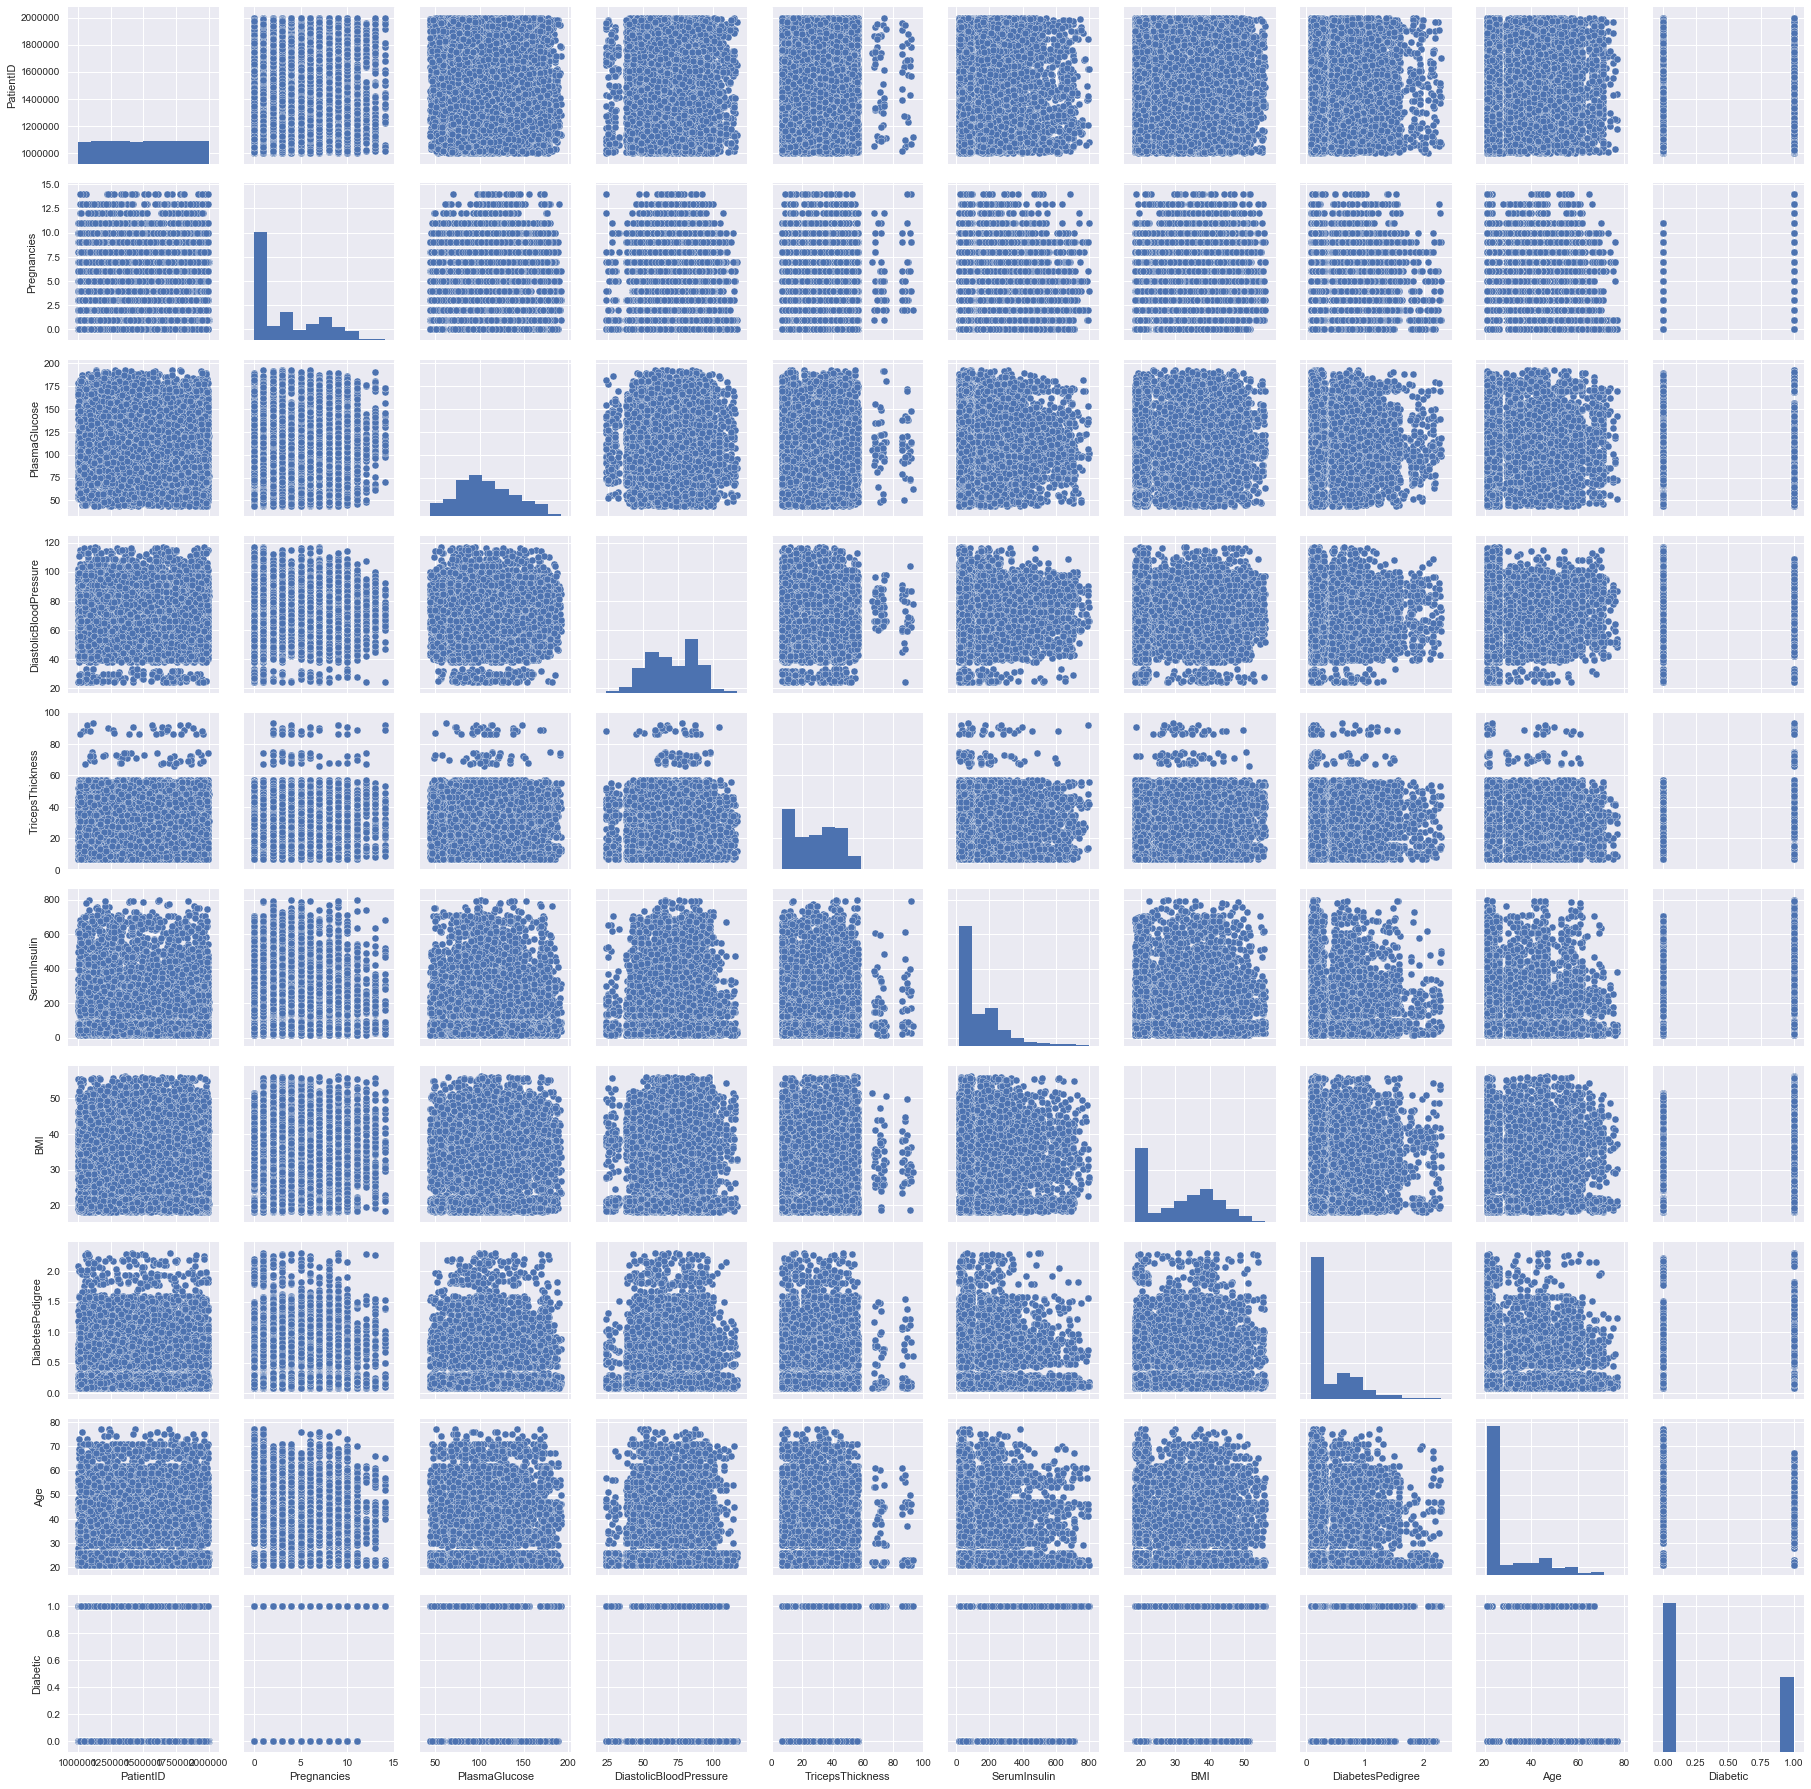

In [64]:
sns.pairplot(df1)

In [82]:
df1['Age'] = np.log(df1['Age'])

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [84]:
sc= StandardScaler()
mms = MinMaxScaler()

In [85]:
sc.fit(df1[['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',  'BMI']])
df1[['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness','BMI']] = sc.transform(df1[['PlasmaGlucose', 'DiastolicBloodPressure', 
                                                                                                              'TricepsThickness','BMI']])

In [87]:
mms.fit(df1[['Pregnancies', 'DiabetesPedigree', 'SerumInsulin', 'Age']])
df1[['Pregnancies', 'DiabetesPedigree','SerumInsulin', 'Age']] = mms.transform(df1[['Pregnancies', 
                                                                                    'DiabetesPedigree', 'SerumInsulin', 'Age']])

In [88]:
df1.head(3)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0.000000,1.974401,0.523884,0.356298,0.011465,1.229683,0.510511,0.000000,0
1,1147438,0.571429,-0.495823,1.299626,1.249448,0.028025,-1.052302,0.036123,0.070017,0
2,1640031,0.500000,0.223356,-1.445306,1.592967,0.026752,1.024922,0.000438,0.070017,0


(array([5042., 1990., 1957., 1001.,   79.,  407.,  423.,  468.,  141.,
         326.,  236.,  853.,  576.,  226.,  384.,  374.,  230.,  118.,
         141.,   28.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

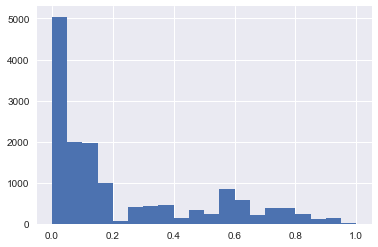

In [89]:
plt.hist(df1['Age'], bins=20)

In [90]:
x = df1.drop(['PatientID', 'Diabetic'], axis=1)
y = df1['Diabetic']

In [91]:
from sklearn.model_selection import KFold, cross_val_predict

In [92]:
kfold = KFold(n_splits = 8)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier()

In [104]:
pred_cv = cross_val_predict(rfc, x, y, cv=kfold)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [99]:
pred_train = rfc.fit(X_train, y_train).predict(X_train)
pred_test = rfc.fit(X_train, y_train).predict(X_test)

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print('Train Result', classification_report(y_train, pred_train))
print('Test Result', classification_report(y_test, pred_test))

Train Result              precision    recall  f1-score   support

          0       0.99      1.00      1.00      6987
          1       1.00      0.99      0.99      3513

avg / total       1.00      1.00      1.00     10500

Test Result              precision    recall  f1-score   support

          0       0.94      0.96      0.95      3013
          1       0.92      0.89      0.90      1487

avg / total       0.94      0.94      0.94      4500



In [105]:
print(classification_report(y, pred_cv))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95     10000
          1       0.92      0.86      0.89      5000

avg / total       0.93      0.93      0.93     15000

